In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px
import plotly.express as ex


In [2]:
df = pd.read_csv("turkey_earthquakes(1915-2021).csv", delimiter=";")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17370 entries, 0 to 17369
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   No           17370 non-null  int64  
 1   Deprem Kodu  17370 non-null  float64
 2   Olus tarihi  17370 non-null  object 
 3   Olus zamani  17370 non-null  object 
 4   Enlem        17370 non-null  float64
 5   Boylam       17370 non-null  float64
 6   Derinlik     17370 non-null  float64
 7   xM           17370 non-null  float64
 8   MD           17370 non-null  float64
 9   ML           17370 non-null  float64
 10  Mw           4645 non-null   float64
 11  Ms           17370 non-null  float64
 12  Mb           17370 non-null  float64
 13  Tip          17370 non-null  object 
 14  Yer          17370 non-null  object 
dtypes: float64(10), int64(1), object(4)
memory usage: 2.0+ MB


In [4]:
df.shape

(17370, 15)

In [5]:
df.head()

,No,Deprem Kodu,Olus tarihi,Olus zamani,Enlem,Boylam,Derinlik,xM,MD,ML,Mw,Ms,Mb,Tip,Yer
0,1,2.021010e+13,2021.01.01,16:36:21.41,35.9273,27.8658,26.1,3.9,0.0,3.9,3.7,0.0,0.0,Ke,RODOS ADASI (AKDENIZ)
1,2,2.020120e+13,2020.12.31,00:51:27.94,37.8435,26.7775,8.0,3.8,0.0,3.8,3.7,0.0,0.0,Ke,EGE DENIZI
2,3,2.020120e+13,2020.12.30,18:45:12.79,36.4918,28.7092,5.0,3.9,0.0,3.7,3.9,0.0,0.0,Ke,AKDENIZ
3,4,2.020120e+13,2020.12.30,13:40:12.22,37.7960,26.4165,14.4,4.4,0.0,4.4,4.3,0.0,0.0,Ke,ONIKI ADALAR (AKDENIZ)
4,5,2.020120e+13,2020.12.27,20:08:36.88,38.4172,39.1482,5.0,3.9,0.0,3.7,3.9,0.0,0.0,Ke,KAVAKKOY-SIVRICE (ELAZIG) [South West 0.5 km]


In [6]:
df.tail()

,No,Deprem Kodu,Olus tarihi,Olus zamani,Enlem,Boylam,Derinlik,xM,MD,ML,Mw,Ms,Mb,Tip,Yer
17365,17366,1.915090e+13,1915.09.23,07:20:01.00,40.00,43.00,15.0,4.4,4.4,0.0,NaN,0.0,0.0,Ke,EVYAPAN-KAGIZMAN (KARS) [South West 5.8 km]
17366,17367,1.915050e+13,1915.05.19,04:48:02.40,37.62,39.47,10.0,5.5,5.3,5.3,5.5,5.4,5.3,Ke,CATLI-SIVEREK (SANLIURFA) [South East 3.5 km]
17367,17368,1.915040e+13,1915.04.01,05:41:05.00,40.50,44.50,35.0,4.9,4.8,4.8,4.9,4.8,4.9,Ke,AZERBAYCAN
17368,17369,1.915020e+13,1915.02.28,12:47:02.40,37.70,43.10,30.0,5.5,5.2,5.2,5.5,5.3,5.2,Ke,MEZRA-BEYTUSSEBAP (SIRNAK) [North West 9.0 km]
17369,17370,1.915020e+13,1915.02.14,08:20:00.60,38.80,42.50,30.0,5.7,5.4,5.4,5.7,5.6,5.4,Ke,CEMALETTIN-AHLAT (BITLIS) [South West 3.7 km]


In [7]:
df.isnull().sum()

No                 0
Deprem Kodu        0
Olus tarihi        0
Olus zamani        0
Enlem              0
Boylam             0
Derinlik           0
xM                 0
MD                 0
ML                 0
Mw             12725
Ms                 0
Mb                 0
Tip                0
Yer                0
dtype: int64

In [8]:
duplicated = len(df[df.duplicated()])
print(f'Tekrar eden satır sayısı: {duplicated}')

Tekrar eden satır sayısı: 0


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
No,17370.0,8.685500e+03,5.014431e+03,1.000000e+00,4.343250e+03,8.685500e+03,1.302775e+04,1.737000e+04
Deprem Kodu,17370.0,1.995628e+13,1.972321e+11,1.915020e+13,1.984040e+13,2.000010e+13,2.011100e+13,2.021010e+13
Enlem,17370.0,3.808733e+01,1.639449e+00,3.500000e+01,3.681000e+01,3.823000e+01,3.923000e+01,4.199820e+01
Boylam,17370.0,3.207730e+01,5.836045e+00,2.600000e+01,2.755000e+01,2.938050e+01,3.632308e+01,4.499920e+01
Derinlik,17370.0,1.555118e+01,2.143770e+01,0.000000e+00,5.000000e+00,9.000000e+00,1.500000e+01,1.990000e+02
xM,17370.0,3.982637e+00,5.424479e-01,3.500000e+00,3.600000e+00,3.800000e+00,4.200000e+00,7.900000e+00
MD,17370.0,1.939413e+00,2.014563e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.700000e+00,7.400000e+00
ML,17370.0,2.070961e+00,2.063218e+00,0.000000e+00,0.000000e+00,3.400000e+00,3.900000e+00,7.200000e+00
Mw,4645.0,4.178471e+00,1.056921e+00,0.000000e+00,3.700000e+00,4.200000e+00,4.800000e+00,7.700000e+00
Ms,17370.0,5.342487e-01,1.511660e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.900000e+00


In [10]:
print("Last date: ", df["Olus tarihi"].max())
print("First date: ", df["Olus tarihi"].min())

Last date:  2021.01.01
First date:  1915.02.14


In [11]:
df["Olus zamani"].max()

'23:59:57.60'

In [12]:
df["Olus zamani"] = df['Olus zamani'].str.split('.').str[0]

In [13]:
for i in range(0, len(df)):
    if float(df['Olus zamani'][i][6:]) >= 60:
        df = df.drop(i)
df = df.reset_index(drop=True)

In [14]:
df["Olus zamani"].max()

'23:59:57'

In [15]:
df["date_"] = pd.to_datetime(df["Olus tarihi"])
df['Olus yılı'] = df['date_'].dt.year
df['month'] = df['date_'].dt.month
df['day'] = df['date_'].dt.day

In [16]:
tmp = df[['Olus yılı','month']]
tmp = tmp.groupby(by='Olus yılı').agg(lambda x:x.value_counts().index[0])
print(tmp)
tmp = tmp.reset_index()
months = ['Ocak', 'Şubat', 'Mart', 'Nisan', 'Mayıs', 'Haziran', 'Temmuz', 'Ağustos', 'Eylül', 'Ekim', 'Kasım', 'Aralık']
months = {k:months[k] for k in range(0,12)}
tmp['month'] = tmp['month'].replace(months)

fig = ex.pie(tmp, names='month',title='Aylara Göre Deprem Oranları')
fig.show()

           month
Olus yılı       
1915           2
1916          11
1917           6
1918          11
1919           8
...          ...
2017           7
2018           9
2019           3
2020           1
2021           1

[107 rows x 1 columns]


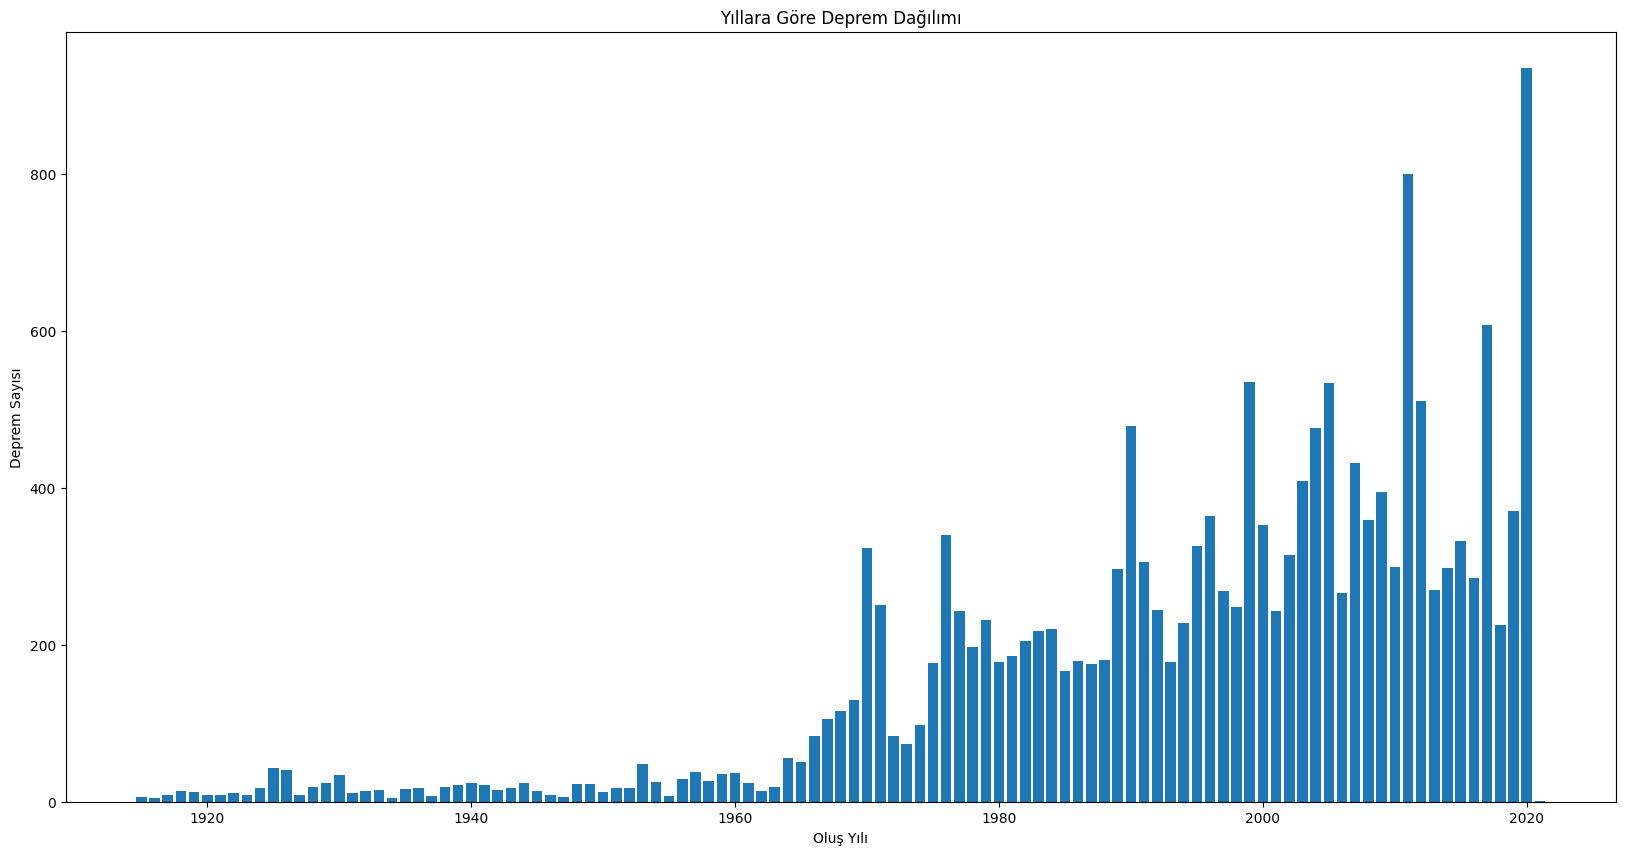

In [17]:
plt.figure(figsize=(20,10))
plt.bar(x = df["Olus yılı"].value_counts().index, height = df["Olus yılı"].value_counts().values)

plt.xlabel("Oluş Yılı")
plt.ylabel("Deprem Sayısı")
plt.title("Yıllara Göre Deprem Dağılımı")
plt.show()

In [18]:
df["Olus zamani"] = pd.to_datetime(df["Olus zamani"])

In [19]:
df = df.drop(["Olus tarihi", "No", "Deprem Kodu", "Tip"], axis=1)
df.head()

,Olus zamani,Enlem,Boylam,Derinlik,xM,MD,ML,Mw,Ms,Mb,Yer,date_,Olus yılı,month,day
0,2023-08-04 16:36:21,35.9273,27.8658,26.1,3.9,0.0,3.9,3.7,0.0,0.0,RODOS ADASI (AKDENIZ),2021-01-01,2021,1,1
1,2023-08-04 00:51:27,37.8435,26.7775,8.0,3.8,0.0,3.8,3.7,0.0,0.0,EGE DENIZI,2020-12-31,2020,12,31
2,2023-08-04 18:45:12,36.4918,28.7092,5.0,3.9,0.0,3.7,3.9,0.0,0.0,AKDENIZ,2020-12-30,2020,12,30
3,2023-08-04 13:40:12,37.7960,26.4165,14.4,4.4,0.0,4.4,4.3,0.0,0.0,ONIKI ADALAR (AKDENIZ),2020-12-30,2020,12,30
4,2023-08-04 20:08:36,38.4172,39.1482,5.0,3.9,0.0,3.7,3.9,0.0,0.0,KAVAKKOY-SIVRICE (ELAZIG) [South West 0.5 km],2020-12-27,2020,12,27


### Bölge isimlerinin bulunması
- Veri seti içindeki Yer bilgileri ayrıştırıldı.
- Yer bilgisi içinde parantezle belirtilen konumlar varsa, yer bilgisi olarak bu konumlar alındı.

In [20]:
df["Yer"].unique()


Yer = []

for i in range(0, len(df)):
    # Yer listesi uzunluğu belirlendi.
    Yer.append("")
    Yer[i] = df['Yer'][i]
    if Yer[i].find("(") != -1:
        Yer[i] = Yer[i].split('(')[1]
        Yer[i] = Yer[i].split(')')[0]
Yer = pd.DataFrame(Yer)

In [21]:
Yer = Yer[0].str.split('[').str[0].to_frame()
Yer.columns = ['Yer']

df['Yer'] = Yer

In [22]:
Yer_update = {"?ORUM": "CORUM", "K?TAHYA": "KUTAHYA", "EGE DENiZi": "EGE DENIZI",
              "DiYARBAKIR": "DIYARBAKIR", "T?RKiYE-iRAN SINIR B?LGESi": "TURKIYE-IRAN SINIR BOLGESI",
              "BALIKESiR ": "BALIKESIR", "SiVAS": "SIVAS", "iZMiR": "IZMIR", "TUNCELi": "TUNCELI",
              "SURiYE": "SURIYE", "ESKiSEHiR": "ESKISEHIR", "DENiZLi": "DENIZLI", "BiTLiS": "BITLIS",
              "KiLiS": "KILIS", "VAN G?L?": "VAN GOLU", "?ANKIRI": "CANKIRI",
              "T?RKIYE-IRAN SINIR B?LGESI": "TURKIYE-IRAN SINIR BOLGESI", "MANiSA": "MANISA",
              "AKDENiZ": "AKDENIZ", "G?RCiSTAN": "GURCISTAN", "BiNGOL": "BINGOL", "OSMANiYE": "OSMANIYE",
              "KIRSEHiR": "KIRSEHIR", "MARMARA DENiZi": "MARMARA DENIZI", "ERZiNCAN": "ERZINCAN",
              "BALIKESiR": "BALIKESIR", "GAZiANTEP": "GAZIANTEP", "G?RCISTAN": "GURCISTAN",
              "?ANAKKALE'": "CANAKKALE", "HAKKARi": "HAKKARI", "AFYONKARAHiSAR": "AFYONKARAHISAR",
              "BiLECiK": "BILECIK", "KAYSERi": "KAYSERI", "T?RKiYE-IRAK SINIR B?LGESi": "TURKIYE-IRAK SINIR BOLGESI",
              "KARADENiZ": "KARADENIZ", "T?RKIYE-IRAK SINIR B?LGESI": "TURKIYE-IRAK SINIR BOLGESI",
              "KARAB?K": "KARABUK", "KIBRIS-SADRAZAMK?Y?K": "KIBRIS-SADRAZAMKOY",
              "T?RKIYE-SURIYE SINIR B?LGESI?K": "TURKIYE-SURIYE SINIR BOLGESI", "?ANAKKALE": "CANAKKALE",
              "KIBRIS-SADRAZAMK?Y": "KIBRIS-SADRAZAMKOY", "ERZURUM ": "ERZURUM",
              "T?RKIYE-SURIYE SINIR B?LGESI": "TURKIYE-SURIYE SINIR BOLGESI", "ADANA ": "ADANA", "KUS G?L?": "KUS GOLU",
              "BURDUR ": "BURDUR", "KIBRIS-G?ZELYURT": "KIBRIS-GUZELYURT", "KONYA ": "KONYA",
              "KOCAELI ": "KOCAELI", "AMASYA ": "AMASYA", "KIRSEHIR ": "KIRSEHIR",
              "KIBRIS-KILI?ASLAN": "KIBRIS-KILICASLAN", "KIBRIS-Z?MR?TK?Y": "KIBRIS-ZUMRUTKOY",
              "DENIZLI ": "DENIZLI", "MANISA ": "MANISA", "ULUBAT G?L?": "ULUBAT GOLU",
              "T?RKIYE-ERMENISTAN SINIR B?LGESI": "TURKIYE-ERMENISTAN SINIR BOLGESI",
              "ERZINCAN ": "ERZINCAN", "TOKAT ": "TOKAT", "ARDAHAN ": "ARDAHAN"}
df['Yer'] = df['Yer'].replace(Yer_update)
df['Yer'].head(25)

0        AKDENIZ
1     EGE DENIZI
2        AKDENIZ
3        AKDENIZ
4         ELAZIG
5        AKDENIZ
6         ELAZIG
7         ELAZIG
8            VAN
9        AKDENIZ
10         AYDIN
11        SURIYE
12           VAN
13         MUGLA
14       ANTALYA
15       AKDENIZ
16       AKDENIZ
17       AKDENIZ
18       AKDENIZ
19           VAN
20         AYDIN
21         BURSA
22       AKDENIZ
23         CORUM
24    EGE DENIZI
Name: Yer, dtype: object

In [23]:
df["Yer"].value_counts(ascending=False).head(20)

AKDENIZ           4254
EGE DENIZI        1405
VAN                855
MUGLA              719
KUTAHYA            688
MANISA             601
DENIZLI            480
IZMIR              449
BINGOL             370
BALIKESIR          365
BURDUR             359
ELAZIG             351
ERZURUM            339
AFYONKARAHISAR     319
ANTALYA            270
CANAKKALE          266
MALATYA            220
MARMARA DENIZI     219
ANKARA             214
BURSA              192
Name: Yer, dtype: int64

In [24]:
# Depremin şiddeti ve derinliğine göre veriler ayrıştırıldı.

big= df[df["xM"]> 6]
print(f"Şiddeti 6'dan büyük depremler: {len(big)}\n")

Şiddeti 6'dan büyük depremler: 77



In [25]:
dept_ = df[(df["xM"] > 6) & (df["Derinlik"] > 10)]
print(f"Derinliği 10 kilometreden büyük depremler: {len(dept_)}\n")

Derinliği 10 kilometreden büyük depremler: 43



In [26]:
print(df[(df["xM"] > 6) & (df["Derinlik"] > 10)])

              Olus zamani    Enlem   Boylam  Derinlik   xM   MD   ML   Mw  \
264   2023-08-04 11:51:24  37.8877  26.7057      11.2  6.9  0.0  6.7  6.9   
1900  2023-08-04 12:28:37  38.8468  26.3252      14.4  6.3  0.0  6.3  6.1   
2678  2023-08-04 18:07:44  35.1613  26.9055      29.4  6.1  0.0  6.1  5.8   
4564  2023-08-04 13:29:08  35.5138  26.5798      57.1  6.2  0.0  6.2  6.1   
5488  2023-08-04 03:26:33  35.7948  27.8798      30.9  6.4  0.0  6.4  6.3   
8854  2023-08-04 16:57:20  40.7400  31.2100      25.0  7.2  7.2  0.0  NaN   
9070  2023-08-04 00:01:37  40.7600  29.9700      18.0  7.4  7.4  0.0  NaN   
9398  2023-08-04 13:55:51  36.9600  35.5200      18.0  6.3  6.3  0.0  NaN   
11057 2023-08-04 17:18:39  39.7200  39.6300      23.0  6.8  0.0  0.0  NaN   
13179 2023-08-04 04:12:28  40.3500  42.1800      16.0  6.8  0.0  0.0  NaN   
14964 2023-08-04 09:20:12  38.5100  40.7700      32.0  6.6  0.0  0.0  NaN   
15040 2023-08-04 05:15:07  40.4500  26.1200      15.0  6.7  0.0  5.7  NaN   

In [27]:
# En sık deprem olan 10 bölge

Yer_count = df.groupby('Yer').size().reset_index(name='sayi')
Yer_count_top = Yer_count.nlargest(10, 'sayi')[['Yer', 'sayi']]
fig = px.bar(Yer_count_top, x='Yer', y='sayi', color='Yer', text='sayi')
fig.update_layout(title_text='En sık deprem olan 5 bölge', title_x=0.5, title_font=dict(size=20))
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()

In [28]:
fig = px.histogram(df, x="xM")
fig.update_layout(title_text='Büyüklük Dağılımı', title_x=0.5)
fig.show()

In [29]:
fig = px.histogram(df, x="Derinlik")
fig.update_layout(title_text="Derinlik(km) Dağılımı", title_x=0.5)
fig.show()

In [30]:
fig = px.scatter(df, x='xM', y='Derinlik')
fig.update_layout(title='Derinlik ve Büyüklük Arasındaki İlişki', title_x=0.5)
fig.show()